# Yelp Review Sentiment Analysis
Artificial Neural Networks and Deep Learning Final Project; 1 July 2022
<br>
*Ashlyn B. Aske, Sandhya Thomas, Nikolas Anderson*

### Reading in Data & Pre-processing

In [1]:
import numpy as np
import pandas as pd
import io
from io import BytesIO
import matplotlib.pyplot as plt

source: https://towardsdatascience.com/importing-data-to-google-colab-the-clean-way-5ceef9e9e3c8

In [2]:
from google.colab import files
uploaded = files.upload()

reviews = pd.read_csv(io.BytesIO(uploaded['yelp.csv']))

Saving yelp.csv to yelp.csv


In [3]:
# removing all the schema from the dataset that we don't need for our analysis
columns_kept = ["stars", "text"]

def keep_columns(reviews, columns_kept):
    dropData = list(set(list(reviews)) - set(columns_kept))
    return reviews.drop(dropData, axis=1)

reviews = reviews.pipe(keep_columns, columns_kept)

In [4]:
reviews.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


In [5]:
reviews["text"]

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate. Rice is so good and I als...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
                              ...                        
9995    First visit...Had lunch here today - used my G...
9996    Should be called house of deliciousness!\n\nI ...
9997    I recently visited Olive and Ivy for business ...
9998    My nephew just moved to Scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 10000, dtype: object

### Determining word & character count distribution

In [6]:
# creating a column of the number of characters in each review
reviews['char length'] = reviews.apply(lambda row: len(row.text), axis = 1)

In [7]:
reviews.head()

,stars,text,char length
0,5,My wife took me here on my birthday for breakf...,889
1,5,I have no idea why some people give bad review...,1345
2,4,love the gyro plate. Rice is so good and I als...,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",419
4,5,General Manager Scott Petello is a good egg!!!...,469


In [8]:
reviews.shape

(10000, 3)

In [9]:
# splitting the reviews at the spaces & counting the number of words in each review
word_count = reviews['text'].str.split().str.len()

(array([2039., 2602., 1886., 1243.,  775.,  498.,  331.,  204.,  130.,
          90.,   54.,   42.,   34.,   18.,   11.,   10.,    8.,    9.,
           4.,   12.]),
 array([1.0000e+00, 2.5080e+02, 5.0060e+02, 7.5040e+02, 1.0002e+03,
        1.2500e+03, 1.4998e+03, 1.7496e+03, 1.9994e+03, 2.2492e+03,
        2.4990e+03, 2.7488e+03, 2.9986e+03, 3.2484e+03, 3.4982e+03,
        3.7480e+03, 3.9978e+03, 4.2476e+03, 4.4974e+03, 4.7472e+03,
        4.9970e+03]),
 <a list of 20 Patch objects>)

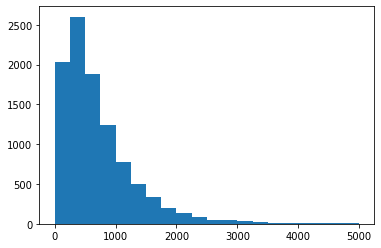

In [10]:
# plotting the character counts in a histogram
plt.hist(reviews["char length"], bins=20)

(array([2188., 2579., 1894., 1209.,  759.,  462.,  331.,  206.,  108.,
          78.,   57.,   40.,   25.,   12.,   17.,    9.,    5.,    9.,
           6.,    6.]),
 array([  1. ,  48.2,  95.4, 142.6, 189.8, 237. , 284.2, 331.4, 378.6,
        425.8, 473. , 520.2, 567.4, 614.6, 661.8, 709. , 756.2, 803.4,
        850.6, 897.8, 945. ]),
 <a list of 20 Patch objects>)

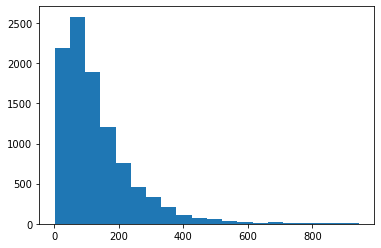

In [11]:
# plotting the length of the reviews by word count
plt.hist(word_count, bins=20)

### Removing stopwords
source: https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

In [12]:
# Import stopwords with scikit-learn
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS
stop = list(stop)
word = 'never'
if word in stop: print(True)
stop.remove('never')

reviews['text-no-stopwords'] = reviews['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
reviews.head()

True


,stars,text,char length,text-no-stopwords
0,5,My wife took me here on my birthday for breakf...,889,My wife took birthday breakfast excellent. The...
1,5,I have no idea why some people give bad review...,1345,"I idea people bad reviews place. It goes you, ..."
2,4,love the gyro plate. Rice is so good and I als...,76,love gyro plate. Rice good I dig candy selecti...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",419,"Rosie, Dakota, I LOVE Chaparral Dog Park!!! It..."
4,5,General Manager Scott Petello is a good egg!!!...,469,General Manager Scott Petello good egg!!! Not ...


### Tokenization

In [13]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
# hyperparameters
num_words = 500 # max number of unique words in the dataset
maxlen = 200 # max number of words included in each review
oov_token = '<UNK>' # default characters for words that are less common than the most common num_words
pad_type = 'post' # add padding characters for too-short reviews at the end
trunc_type = 'post' # truncate too-long reviews at the end

In [17]:
from pprint import pprint
# Create tokenizer based on text data
tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(reviews['text'])

# Create text data word index
word_index = tokenizer.word_index
print("word_index",word_index,'\n',len(word_index))

# Encode text data into tokenized sequences
sequences_notpadded = tokenizer.texts_to_sequences(reviews['text'])
print("sequences",sequences_notpadded[0],'\n',sequences_notpadded[1])

# Pad the sequences
sequences = pad_sequences(sequences_notpadded, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

# Categorize the sequences
#sequences = to_categorical(sequences, num_classes=num_words)

word_index {'<UNK>': 1, 'the': 2, 'and': 3, 'i': 4, 'a': 5, 'to': 6, 'of': 7, 'was': 8, 'is': 9, 'it': 10, 'for': 11, 'in': 12, 'that': 13, 'my': 14, 'with': 15, 'but': 16, 'you': 17, 'this': 18, 'on': 19, 'they': 20, 'we': 21, 'have': 22, 'not': 23, 'had': 24, 'are': 25, 'good': 26, 'so': 27, 'place': 28, 'at': 29, 'food': 30, 'were': 31, 'as': 32, 'be': 33, 'there': 34, 'great': 35, 'like': 36, 'if': 37, 'all': 38, 'me': 39, 'out': 40, 'just': 41, 'very': 42, 'here': 43, 'one': 44, 'or': 45, 'their': 46, 'get': 47, "it's": 48, 'from': 49, 'up': 50, 'go': 51, 'when': 52, 'time': 53, 'really': 54, 'our': 55, 'about': 56, 'some': 57, 'service': 58, 'would': 59, 'an': 60, 'what': 61, 'been': 62, 'can': 63, 'which': 64, 'your': 65, 'back': 66, 'more': 67, 'only': 68, 'will': 69, 'also': 70, "don't": 71, 'by': 72, 'no': 73, 'too': 74, 'love': 75, "i'm": 76, 'little': 77, 'nice': 78, 'has': 79, 'well': 80, 'other': 81, 'because': 82, "i've": 83, 'them': 84, 'do': 85, 'always': 86, 'even': 8

In [18]:
# Bag of words tokenization
BOW_format = tokenizer.sequences_to_matrix(sequences_notpadded, mode='count')
BOW_format.shape



(10000, 500)

In [19]:
# Set X and Y
X, y = sequences, reviews['stars']
# change y values to 1 or 0 for binary classification (>3 or <=3)
y = (y > 3)*1

In [20]:
# (len(reviews['text']) x maxlen)
X.shape

(10000, 200)

### Splitting into training & test sets

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

### Network

type of network: linear regression;
mean-squared error

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten, Dropout, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras
from keras.regularizers import l2
'''
from hw:
model = Sequential()
model.add(LSTM(128, input_shape=(seqlen, len(chars)), return_sequences=True))
model.add(Dense(len(chars), activation='softmax'))
'''

model = Sequential()
model.add(Embedding(500, 100, input_length=200))
model.add(LSTM(25, kernel_regularizer=l2(0.01), return_sequences=True)) # regularization for overfitting
model.add(Dropout(0.2)) # dropout for overfitting
model.add(Flatten())
model.add(Dense(1, kernel_regularizer=l2(0.01), activation='sigmoid')) #sigmoid for binary classification

model.compile(
    loss='BinaryCrossentropy', #binary cross entropy
    optimizer='Adam',#RMSprop(learning_rate=0.01),
    metrics=['binary_crossentropy', 'accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          50000     
                                                                 
 lstm (LSTM)                 (None, 200, 25)           12600     
                                                                 
 dropout (Dropout)           (None, 200, 25)           0         
                                                                 
 flatten (Flatten)           (None, 5000)              0         
                                                                 
 dense (Dense)               (None, 1)                 5001      
                                                                 
Total params: 67,601
Trainable params: 67,601
Non-trainable params: 0
_________________________________________________________________


(array([    0.,     0.,     0.,     0.,     0., 10000.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

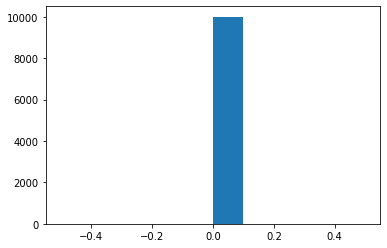

In [23]:
# baseline accuracy is 68%
plt.hist((y > 3)*1)

In [24]:
# fit the binary classification model
history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_test, y_test))


Epoch 1/20
160/160 [==============================] - 20s 107ms/step - loss: 0.8995 - binary_crossentropy: 0.5487 - accuracy: 0.7230 - val_loss: 0.5557 - val_binary_crossentropy: 0.4760 - val_accuracy: 0.7670
Epoch 2/20
160/160 [==============================] - 16s 103ms/step - loss: 0.4860 - binary_crossentropy: 0.4382 - accuracy: 0.7940 - val_loss: 0.4853 - val_binary_crossentropy: 0.4515 - val_accuracy: 0.7855
Epoch 3/20
160/160 [==============================] - 16s 103ms/step - loss: 0.4392 - binary_crossentropy: 0.4108 - accuracy: 0.8075 - val_loss: 0.4738 - val_binary_crossentropy: 0.4505 - val_accuracy: 0.7905
Epoch 4/20
160/160 [==============================] - 17s 109ms/step - loss: 0.4217 - binary_crossentropy: 0.4007 - accuracy: 0.8192 - val_loss: 0.4999 - val_binary_crossentropy: 0.4805 - val_accuracy: 0.7605
Epoch 5/20
160/160 [==============================] - 17s 104ms/step - loss: 0.4189 - binary_crossentropy: 0.3997 - accuracy: 0.8181 - val_loss: 0.5070 - val_binary

Text(0.5, 1.0, 'binary classification model')

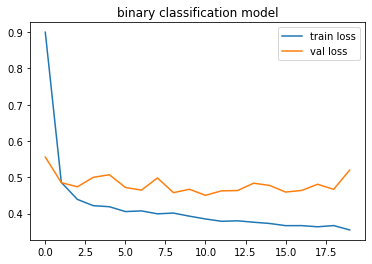

In [25]:
plt.plot( history.history['loss'], label = 'train loss')
plt.plot( history.history['val_loss'], label = 'val loss')
plt.legend()
plt.title("binary classification model")

In [26]:
prediction = model.predict(X_test)

In [27]:
prediction.shape

(2000, 1)

In [28]:
np.mean((prediction - y_test.to_numpy().reshape(2000,1))**2)

0.15093521938341423

Text(0.5, 1.0, 'binary classification')

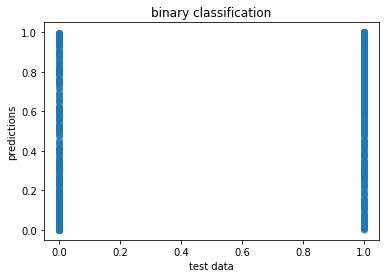

In [29]:
plt.scatter(y_test,prediction,alpha=0.3)
plt.xlabel("test data")
plt.ylabel("predictions")
plt.title("binary classification")

In [30]:
# bag of words
model_BOW = Sequential()
model_BOW.add(Dense(500))
model_BOW.add(Dropout(0.2))
model_BOW.add(Dense(1, activation='sigmoid')) #sigmoid

model_BOW.compile(
    loss='BinaryCrossentropy', # mean squared error ##binary cross entropy
    optimizer='Adam',#RMSprop(learning_rate=0.01),
    metrics=['binary_crossentropy', 'accuracy']

)
history_BOW = model_BOW.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_test, y_test))


Epoch 1/20
160/160 [==============================] - 1s 6ms/step - loss: 26.1795 - binary_crossentropy: 26.1795 - accuracy: 0.5676 - val_loss: 13.6464 - val_binary_crossentropy: 13.6464 - val_accuracy: 0.6300
Epoch 2/20
160/160 [==============================] - 1s 4ms/step - loss: 14.2290 - binary_crossentropy: 14.2290 - accuracy: 0.5790 - val_loss: 6.9639 - val_binary_crossentropy: 6.9639 - val_accuracy: 0.5915
Epoch 3/20
160/160 [==============================] - 1s 4ms/step - loss: 8.4368 - binary_crossentropy: 8.4368 - accuracy: 0.5751 - val_loss: 3.5395 - val_binary_crossentropy: 3.5395 - val_accuracy: 0.6070
Epoch 4/20
160/160 [==============================] - 1s 4ms/step - loss: 4.0805 - binary_crossentropy: 4.0805 - accuracy: 0.5685 - val_loss: 2.2509 - val_binary_crossentropy: 2.2509 - val_accuracy: 0.5215
Epoch 5/20
160/160 [==============================] - 1s 4ms/step - loss: 2.0714 - binary_crossentropy: 2.0714 - accuracy: 0.5820 - val_loss: 1.4910 - val_binary_crossent

Text(0.5, 1.0, 'bag of words model')

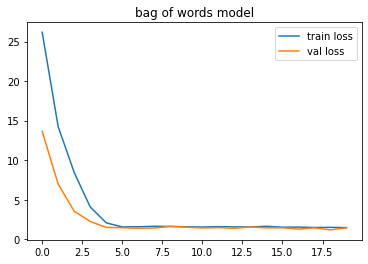

In [31]:
plt.plot( history_BOW.history['loss'], label = 'train loss')
plt.plot( history_BOW.history['val_loss'], label = 'val loss')
plt.legend()
plt.title("bag of words model")